# Challenge 6 - Classification Errors

Date - 8/1/16

Sunne Kuo

Worked with Avi

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score
import seaborn as sns
import pprint
from sklearn import metrics

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import numpy as np

In [8]:
def ROC_viz(clf, x,y): 
    xtrain, xtest, ytrain, ytest = cross_validation.train_test_split(x, y, test_size=0.2, random_state=1234)
    ytrain=np.ravel(ytrain)
    clf = clf.fit(xtrain, ytrain)
    roc=metrics.roc_curve(ytest,clf.predict(xtest))
    auc=metrics.roc_auc_score(ytest,clf.predict(xtest))
    plt.figure()
    # Plotting our Baseline! 
    plt.plot([0,1],[0,1])
    plt.plot(roc[0],roc[1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    print ('fpr', metrics.roc_curve(ytest, clf.predict(xtest))[0][1])
    print ('tpr', metrics.roc_curve(ytest, clf.predict(xtest))[1][1])
    print('AUC score:', auc)

In [72]:
votes_df = pd.read_csv('house-votes-84.data.txt', header = None)
votes_df.head()
votes1 = votes_df.copy()
votes_df.replace(['y', 'n', '?'], [1, 0, np.nan], inplace = True)

means = [np.mean(votes_df[x]) for x in range(len(votes_df.columns)) if x > 0]
means = [round(x) for x in  means]
for x in range(1, len(votes_df.columns)):
    votes_df[x] = votes_df[x].replace(np.nan, round(means[x-1]))  
    
length = int(len(votes_df)*.75)

party = votes_df.iloc[:,:1]
votes = votes_df.iloc[:, 1:]
party.replace(['democrat', 'republican'], [1, 0], inplace = True)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(votes, np.ravel(party), test_size = .3, random_state = 4444)

## Challenge 1 & 3
1) For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).

3) Calculate the same metrics you did in challenge 1, but this time in a cross validation scheme with the cross_val_score function (like in Challenge 9).



In [89]:
accuracy_tup=[]
accuracy = []
precision = []
recall = []
f1_scores = []

for i in range(1, 21):
    neigh = KNeighborsClassifier(n_neighbors=i)
    model = neigh.fit(x_train, y_train)
    accuracy.append(accuracy_score(y_test, model.predict(x_test)))
    accuracy_tup.append((i, accuracy_score(y_test, model.predict(x_test))))
    precision.append(precision_score(y_test, model.predict(x_test)))
    recall.append(recall_score(y_test, model.predict(x_test)))
    f1_scores.append(f1_score(y_test, model.predict(x_test)))

In [92]:

print('K Nearest Neighbors:')
print("Accuracy Array:", max(accuracy))
print("Precision Array:", max(precision))
print("Recall Array:", max(recall))
print("F1 Array:", max(f1_scores))
print('--------------------------------------------')
print('Cross Validation Accuracy:', np.mean(cross_val_score(neigh, votes, np.ravel(party), scoring='accuracy'))) 
print('Cross Validation Precision:', np.mean(cross_val_score(neigh, votes, np.ravel(party), scoring='precision')))
print('Cross Validation Recall:', np.mean(cross_val_score(neigh, votes, np.ravel(party), scoring='recall')))
print('Cross Validation F1:', np.mean(cross_val_score(neigh, votes, np.ravel(party), scoring='f1'))) 
print('\n')

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
print('Logistic Regressio:')
print('Accuracy Score:', accuracy_score(y_test, logreg.predict(x_test)))
logreg_acc = [accuracy_score(y_test, logreg.predict(x_test)) for i in range(1, 21)]
print('Precision Score:', precision_score(y_test, logreg.predict(x_test)))
print('Recall Score:', recall_score(y_test, logreg.predict(x_test)))
print('F1 Score:', f1_score(y_test, logreg.predict(x_test)))
print('\n')
print('Cross Validation Accuracy:', np.mean(cross_val_score(logreg, votes, np.ravel(party), scoring='accuracy'))) 
print('Cross Validation Precision:', np.mean(cross_val_score(logreg, votes, np.ravel(party), scoring='precision')))
print('Cross Validation Recall:', np.mean(cross_val_score(logreg, votes, np.ravel(party), scoring='recall')))
print('Cross Validation F1:', np.mean(cross_val_score(logreg, votes, np.ravel(party), scoring='f1'))) 
print('\n')

nb = GaussianNB()
nb.fit(x_train, y_train)
print('Gaussian Naive Bayes:')
print('Accuracy Score:', accuracy_score(y_test, nb.predict(x_test)))
print('Precision Score:', precision_score(y_test, nb.predict(x_test)))
print('Recall Score:', recall_score(y_test, nb.predict(x_test)))
print('F1 Score:', f1_score(y_test, nb.predict(x_test)))
print('--------------------------------------------')
print('Cross Validation Accuracy:', np.mean(cross_val_score(nb, votes, np.ravel(party), scoring='accuracy'))) 
print('Cross Validation Precision:', np.mean(cross_val_score(nb, votes, np.ravel(party), scoring='precision')))
print('Cross Validation Recall:', np.mean(cross_val_score(nb, votes, np.ravel(party), scoring='recall')))
print('Cross Validation F1:', np.mean(cross_val_score(nb, votes, np.ravel(party), scoring='f1')))
print('\n')

svm = SVC()
svm.fit(x_train, y_train)
print('Support Vector Machines:')
print('Accuracy Score:', accuracy_score(y_test, svm.predict(x_test)))
print('Precision Score:', precision_score(y_test, svm.predict(x_test)))
print('Recall Score:', recall_score(y_test, svm.predict(x_test)))
print('F1 Score:', f1_score(y_test, svm.predict(x_test)))
print('--------------------------------------------')
print('Cross Validation Accuracy:', np.mean(cross_val_score(svm, votes, np.ravel(party), scoring='accuracy'))) 
print('Cross Validation Precision:', np.mean(cross_val_score(svm, votes, np.ravel(party), scoring='precision')))
print('Cross Validation Recall:', np.mean(cross_val_score(svm, votes, np.ravel(party), scoring='recall')))
print('Cross Validation F1:', np.mean(cross_val_score(svm, votes, np.ravel(party), scoring='f1')))
print('\n')

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
print('Decision Tree:')
print('Accuracy Score:', accuracy_score(y_test, tree.predict(x_test)))
print('Precision Score:', precision_score(y_test, tree.predict(x_test)))
print('Recall Score:', recall_score(y_test, tree.predict(x_test)))
print('F1 Score:', f1_score(y_test, tree.predict(x_test)))
print('--------------------------------------------')
print('Cross Validation Accuracy:', np.mean(cross_val_score(tree, votes, np.ravel(party), scoring='accuracy'))) 
print('Cross Validation Precision:', np.mean(cross_val_score(tree, votes, np.ravel(party), scoring='precision')))
print('Cross Validation Recall:', np.mean(cross_val_score(tree, votes, np.ravel(party), scoring='recall')))
print('Cross Validation F1:', np.mean(cross_val_score(tree, votes, np.ravel(party), scoring='f1')))
print('\n')

ensem = RandomForestClassifier()
ensem.fit(x_train, y_train)
print('Random Forests:')
print('Accuracy Score:', accuracy_score(y_test, ensem.predict(x_test)))
print('Precision Score:', precision_score(y_test, ensem.predict(x_test)))
print('Recall Score:', recall_score(y_test, ensem.predict(x_test)))
print('F1 Score:', f1_score(y_test, ensem.predict(x_test)))
print('--------------------------------------------')
print('Cross Validation Accuracy:', np.mean(cross_val_score(ensem, votes, np.ravel(party), scoring='accuracy'))) 
print('Cross Validation Precision:', np.mean(cross_val_score(ensem, votes, np.ravel(party), scoring='precision')))
print('Cross Validation Recall:', np.mean(cross_val_score(ensem, votes, np.ravel(party), scoring='recall')))
print('Cross Validation F1:', np.mean(cross_val_score(ensem, votes, np.ravel(party), scoring='f1')))
print('\n')

K Nearest Neighbors:
Accuracy Array: 0.815217391304
Precision Array: 0.837837837838
Recall Array: 0.959459459459
F1 Array: 0.893081761006
--------------------------------------------
Cross Validation Accuracy: 0.91724137931
Cross Validation Precision: 0.960465104351
Cross Validation Recall: 0.902621722846
Cross Validation F1: 0.930441901919


Logistic Regressio:
Accuracy Score: 0.826086956522
Precision Score: 0.822222222222
Recall Score: 1.0
F1 Score: 0.90243902439


Cross Validation Accuracy: 0.96091954023
Cross Validation Precision: 0.966828308384
Cross Validation Recall: 0.970037453184
Cross Validation F1: 0.968098726334


Gaussian Naive Bayes:
Accuracy Score: 0.836956521739
Precision Score: 0.831460674157
Recall Score: 1.0
F1 Score: 0.907975460123
--------------------------------------------
Cross Validation Accuracy: 0.926436781609
Cross Validation Precision: 0.940776916393
Cross Validation Recall: 0.940074906367
Cross Validation F1: 0.939934127162


Support Vector Machines:
Accur

### Challenges 2 & 5
For each, draw the ROC curve and calculate the AUC.

Draw the ROC curve (and calculate AUC) for the logistic regression classifier from challenge 12.


Logistic Regression
fpr 0.0333333333333
tpr 0.947368421053
AUC score: 0.95701754386


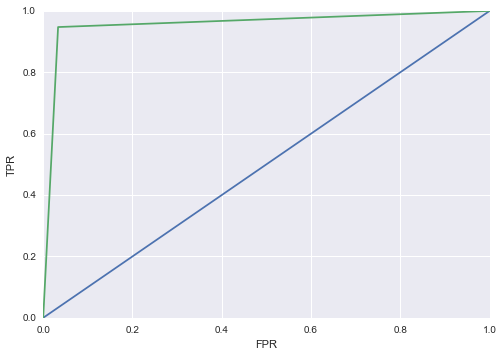

In [101]:
print('Logistic Regression')
ROC_viz(logreg, votes,np.ravel(party))

Naive Bayes
fpr 0.1
tpr 0.929824561404
AUC score: 0.914912280702


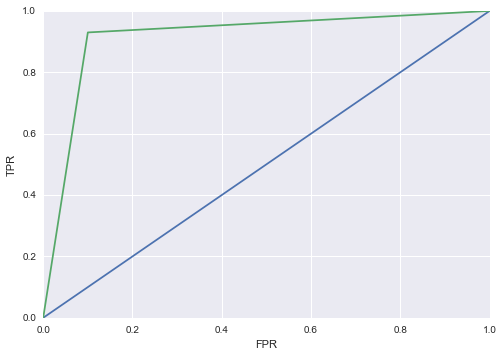

In [102]:
print('Naive Bayes')
ROC_viz(nb, votes,np.ravel(party))

Support Vector Machines
fpr 1.0
tpr 1.0
AUC score: 0.964912280702


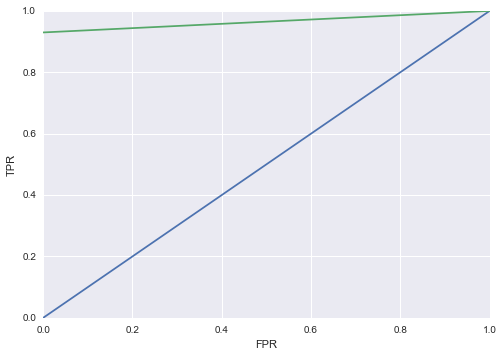

In [103]:
print('Support Vector Machines')
ROC_viz(svm, votes,np.ravel(party))

Decision Tree
fpr 0.0333333333333
tpr 0.947368421053
AUC score: 0.95701754386


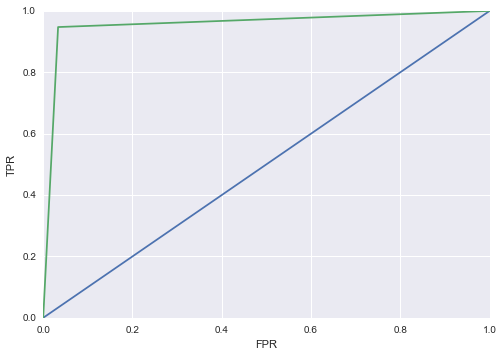

In [104]:
print('Decision Tree')
ROC_viz(tree, votes,np.ravel(party))

Random Forests
fpr 0.0333333333333
tpr 0.929824561404
AUC score: 0.948245614035


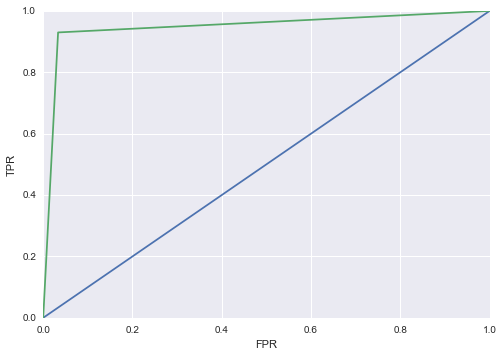

In [105]:
print('Random Forests')
ROC_viz(ensem, votes,np.ravel(party))

In [32]:
x_train, x_test, y_train, y_test = train_test_split(votes, np.ravel(party), test_size = .3, random_state = 4444)

### Challenge 4
For your movie classifiers, calculate the precision and recall for each class.



In [11]:
from patsy import dmatrices
import scipy as sp
import statsmodels.api as sm

In [12]:
movies = pd.read_csv('2013_movies.csv')

In [13]:
#movies.head()

In [14]:
movies['ReleaseDate'] = pd.to_datetime(movies['ReleaseDate'])
movies['Release_Month'] = movies['ReleaseDate'].apply(lambda x: x.month)
#movies.head(2)

In [15]:
x, y = dmatrices('Release_Month ~ Budget + DomesticTotalGross + Runtime + Rating ',\
                 data = movies, return_type = 'dataframe')

In [16]:
x_train, x_test, y_train, y_test = train_test_split(y, np.ravel(x), test_size = .3, random_state = 4444)

In [18]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
print('Accuracy Score:', accuracy_score(y_test, logreg.predict(x_test)))
print('Precision Score:', precision_score(y_test, logreg.predict(x_test)))
print('Recall Score:', recall_score(y_test, logreg.predict(x_test)))


Accuracy Score: 0.148148148148
Precision Score: 0.0374779541446
Recall Score: 0.148148148148


/Users/sunkuo/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/Users/sunkuo/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/sunkuo/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or m